In [8]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')

GRT_QUERY_ENDPOINT = "https://api.thegraph.com/subgraphs/name/convex-community/volume-matic-test"

def grt_query(query):
    r = requests.post(GRT_QUERY_ENDPOINT, json={'query': query})
    return r.json()['data']

pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [9]:
fee_query = """
{ pools(first: 1000) {
  isV2
  id
  name
  dailyPoolSnapshots(first: 1000 orderBy: timestamp orderDirection: desc) {
    timestamp
    adminFeesUSD
    lpFeesUSD
    totalDailyFeesUSD
    eventFeesUSD
    baseApr
    tvl
  }
}
}
"""

In [10]:
data = grt_query(fee_query)['pools']
df = pd.DataFrame([{k: v for k, v in dict({key: val for key, val in entry.items() if key in ['id', 'isV2', 'name']}, **snapshot).items()} for entry in data for snapshot in entry['dailyPoolSnapshots']])
df['totalDailyFeesUSD'] = df['totalDailyFeesUSD'].astype(float)
df['eventFeesUSD'] = df['eventFeesUSD'].astype(float) * 2
df['timestamp'] = pd.to_datetime(df['timestamp'],unit='s')
df = df.sort_values('timestamp', ascending=True)
df

,isV2,id,name,timestamp,adminFeesUSD,lpFeesUSD,totalDailyFeesUSD,eventFeesUSD,baseApr,tvl
9667,False,0x445fe580ef8d70ff569ab36e80c647af338db351,Curve.fi amDAI/amUSDC/amUSDT,2021-05-02,0,0,0.00,0.00,0,220147555.465170900532559201
9666,False,0x445fe580ef8d70ff569ab36e80c647af338db351,Curve.fi amDAI/amUSDC/amUSDT,2021-05-03,12336.49493702458582540109708967138,12336.49493702458582540109708967138,24672.99,0.00,0.0001242052006398339929592103131480798,257409089.0346250359876306681059915
9665,False,0x445fe580ef8d70ff569ab36e80c647af338db351,Curve.fi amDAI/amUSDC/amUSDT,2021-05-04,15522.22121304389566148080152237604,15522.22121304389566148080152237604,31044.44,0.00,0.0002237222637709756181174661890010285,260110640.5590329114303795093493721
9664,False,0x445fe580ef8d70ff569ab36e80c647af338db351,Curve.fi amDAI/amUSDC/amUSDT,2021-05-05,9414.635337498668145777669596402991,9414.635337498668145777669596402989,18829.27,0.00,0.0001651559037716909806897356868275621,274922744.6763086596031594380523188
9663,False,0x445fe580ef8d70ff569ab36e80c647af338db351,Curve.fi amDAI/amUSDC/amUSDT,2021-05-06,10161.19822121527305964058335736735,10161.19822121527305964058335736735,20322.40,0.00,0.0001735265371016202466485850822420314,270251651.0732847372851092942083257
...,...,...,...,...,...,...,...,...,...,...
13231,False,0x64fff0e27c223097c824f9d9278efd5b55c3430e,Curve.fi Factory Plain Pool: WMATIC/ALERTO,2022-06-15,0,0,0.00,0.00,0,0.0000003114074411233071636210606344227492
13201,False,0x63e271a9a8b8eaa47c684732770592320b6cdd80,Curve.fi Factory USD Metapool: pHBD/am3CRV,2022-06-15,0.001005886911363505402074173680841829,0.001005886911363505402074173680841829,0.00,0.00,0.00005564363075353795459943446947369965,18.07831154864700064159368721463484
29223,False,0xd23bc23af71e1d2e04e3ce9c18b29ad3f1e606f4,Curve.fi Factory USD Metapool: SCO/USD,2022-06-15,0,0,0.00,0.00,0,0
28770,False,0xcf42ad1523be78dfe86f7d14f28ee69ff1857dbd,Curve.fi Factory USD Metapool: ARTH.usd + 3Pool,2022-06-15,0,0,0.00,0.00,0,0


In [17]:
pd.set_option('display.max_rows', 500)

df.sort_values('baseApr', ascending=False).head(500)

,isV2,id,name,timestamp,adminFeesUSD,lpFeesUSD,totalDailyFeesUSD,eventFeesUSD,baseApr,tvl,cumulativeDailyFeesUSD
313,False,0x038ff5771ed27e6f14409672285359b79107ead2,Curve.fi Factory Plain Pool: EARTH,2022-05-18,0,0,0.00,0.00,5.014363629938714535861134761746708,0.09957410471072435155560592466130745,11.76
13040,False,0x62619f1091cd0261b7c16199c6c58da694248cff,Curve.fi Factory Plain Pool: 3EUR,2022-01-30,0,0,0.00,0.00,3.848778184567661766304513217103785,0,0.00
15062,False,0x78a8cc2a24fcc5b358bb8a371072403ce092d599,Curve.fi Factory Plain Pool: polygon aave,2022-04-03,0,0,0.00,0.00,3.547032249701717509394706237004878,1897.876346726788386883738396014064,0.02
7796,False,0x3d966d7d6ae268ce4c45edcb82b2a694edc5924e,Curve.fi Factory USD Metapool: usdp/balanceer,2022-06-02,0,0,0.00,0.00,3.397559117454031021397960184095768,0.8100827243763371942964667743013275,0.00
8065,False,0x3de32b6949b0a000e831c98354e93261725a22f7,Curve.fi Factory Plain Pool: am3CRV+AMIS,2022-02-03,0,0,0.00,0.00,2.607811275891774920316783534986563,9.015316384698905876608699387949981,0.32
8067,False,0x3de32b6949b0a000e831c98354e93261725a22f7,Curve.fi Factory Plain Pool: am3CRV+AMIS,2022-02-01,0.1574775720650777209466608339696146,0.1574775720650777209466608339696146,0.31,0.00,1.668218856395349587765864782897971,6.733963358651608016737381679415897,0.32
28558,False,0xce113ffc5b4c9f088bb0ad9459e10387f232c3e3,Curve.fi Factory USD Metapool: MAIpool,2022-02-22,166.6707727389310578170655892302826,166.6707727389310578170655892302826,333.34,0.00,1.456874892391015072402087964261554,281.0709103232149367800499353567542,335.16
1436,False,0x0e9b542172200df93eaf4c6edc919f9923567517,Curve.fi Factory USD Metapool: s / Metaverse I...,2022-01-25,0.04154026336829121468118589850967904,0.04154026336829121468118589850967904,0.08,0.00,0.1962899465994673459596045467214785,1.435671328548654314715209336208771,0.09
5204,False,0x27c23852ff93254cae7d5fd4183b331f700e09e8,Curve.fi Factory Plain Pool: izumi factory,2022-05-02,0.01939303109066435434913875961641791,0.01939303109066435434913875961641791,0.04,0.00,0.1488535658452652046065092394280949,1.551886294844620367312967634290864,0.04
7929,False,0x3da78d5c0ea557c28b4dc92a6629abb03dc6dc7d,Curve.fi Factory USD Metapool: AlertoCrv3,2022-02-05,18.87331927631753594421939190190508,18.87331927631753594421939190190508,37.75,0.00,0.01839766068606719974867457228477894,181.9158530415536321014603285240345,37.76


<AxesSubplot:xlabel='timestamp'>

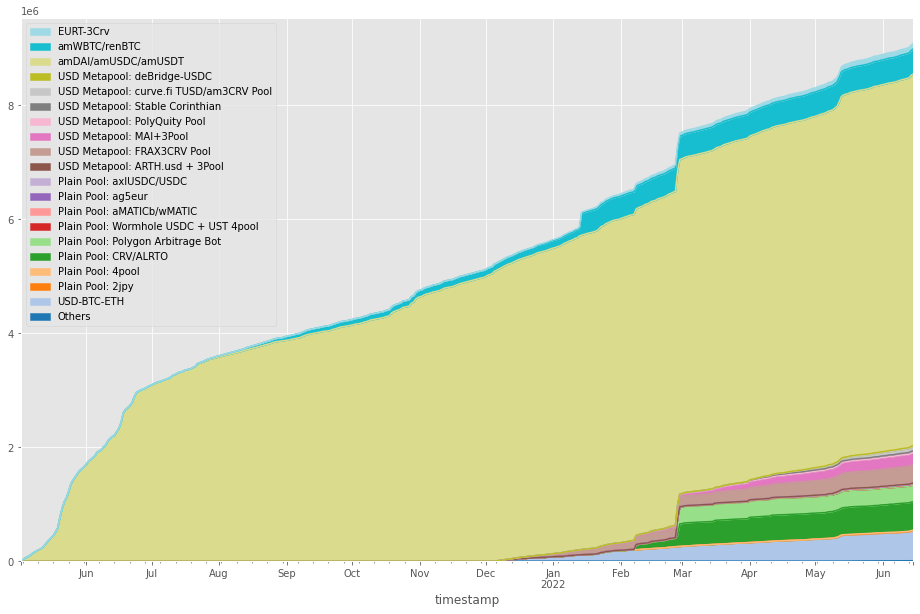

In [11]:
df['cumulativeDailyFeesUSD'] = (df['totalDailyFeesUSD']).groupby(df['id']).cumsum()
chart_data = df[['name', 'timestamp', 'cumulativeDailyFeesUSD']].pivot_table('cumulativeDailyFeesUSD', ['timestamp'], 'name', aggfunc='sum')
top_performers = chart_data.mean().sort_values(ascending=False)[:19].index.tolist()
df_others = df.copy()
df_others['name'] = df_others['name'].apply(lambda x: x if x in top_performers else 'Others')
df['cumulativeDailyFeesUSD'] = (df['totalDailyFeesUSD']).groupby(df['id']).cumsum()
chart_data_others = df_others[['name', 'timestamp', 'cumulativeDailyFeesUSD']].pivot_table('cumulativeDailyFeesUSD', ['timestamp'], 'name', aggfunc='sum')
chart_data_others['Others'] = df_others[df_others['name'] == 'Others'][['timestamp', 'cumulativeDailyFeesUSD']].groupby('timestamp').sum()['cumulativeDailyFeesUSD']
chart_data_others.columns = [s.replace('Curve.fi Factory ', '').replace('Curve.fi ', '').replace('Curve ', '') for s in chart_data_others.columns]
cols = chart_data_others.columns.tolist()
chart_data_others[([cols[-1], *cols[1:-1], cols[0]])].plot.area(figsize=(16, 10), legend='reverse', colormap="tab20")

In [12]:
WEEK = 3600 * 24 * 7
df_week = pd.DataFrame([{k: v for k, v in dict({key: val for key, val in entry.items() if key in ['id', 'isV2', 'name']}, **snapshot).items()} for entry in data for snapshot in entry['dailyPoolSnapshots']])
df_week['totalDailyFeesUSD'] = df_week['totalDailyFeesUSD'].astype(float)
df_week['timestamp'] = df_week['timestamp'].apply(lambda x: ((int(x) // WEEK) * WEEK))
df_week['timestamp'] = pd.to_datetime(df_week['timestamp'],unit='s')
df_week = df_week.sort_values('timestamp', ascending=True)
df_week[['totalDailyFeesUSD', 'timestamp', 'name', 'id']].groupby(['timestamp']).sum()

,totalDailyFeesUSD
timestamp,
2021-04-29,74546.70
2021-05-06,162213.89
2021-05-13,345943.54
2021-05-20,838891.04
2021-05-27,326169.67
2021-06-03,259328.22
2021-06-10,320294.29
2021-06-17,550695.55
2021-06-24,195836.99


In [13]:
df_week[['totalDailyFeesUSD', 'timestamp', 'name', 'id']].groupby(['timestamp']).sum().sum() / 2

totalDailyFeesUSD   4539674.08
dtype: float64